In [1]:
import numpy as np
import pandas as pd
import scipy 
from scipy import stats

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\3rd Semester\\data visualising\\calories\\calories_consumed.csv")

In [3]:
df.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [4]:
df.rename(columns= {'Weight gained (grams)':'WG', 'Calories Consumed':'CC'}, inplace=True)

<BarContainer object of 14 artists>

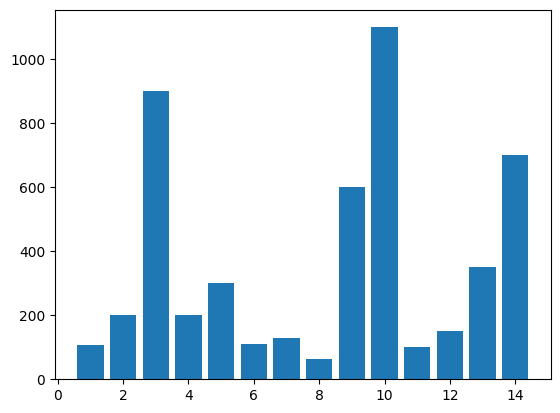

In [5]:
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

plt.bar(height = df.WG, x = np.arange(1, 15, 1))

(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <BarContainer object of 10 artists>)

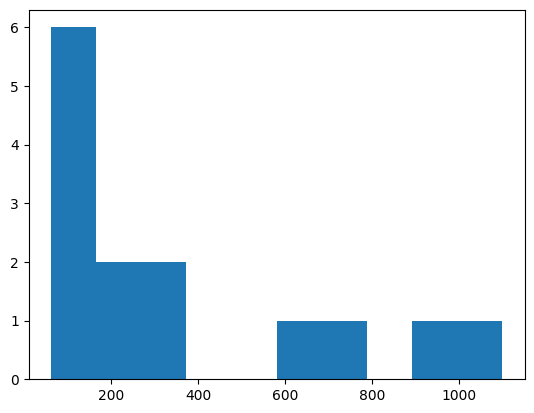

In [6]:
plt.hist(df.WG)

In [7]:
df['WG'].skew()

#  it is positive skewed

1.2557366483972048

In [8]:
df['WG'].kurt()

# it is platykurtic

0.4312724433726336

{'whiskers': [<matplotlib.lines.Line2D at 0x2426d8fd900>,
 'caps': [<matplotlib.lines.Line2D at 0x2426d8fde40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2426d8fd780>],
 'medians': [<matplotlib.lines.Line2D at 0x2426d8fe380>],
 'fliers': [<matplotlib.lines.Line2D at 0x2426d8fe620>],
 'means': []}

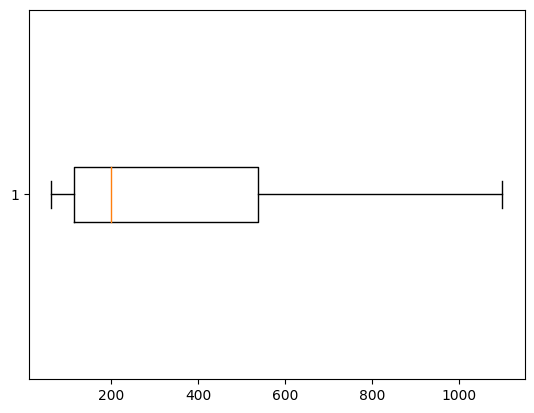

In [9]:
plt.boxplot(df.WG,vert=False)

#  no outlier and positve skewed.

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <BarContainer object of 10 artists>)

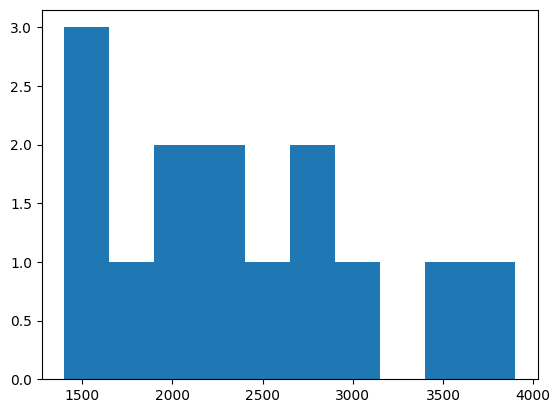

In [10]:
plt.hist(df.CC)

In [11]:
df['CC'].kurt()

-0.29048129735135975

In [12]:
df['CC'].skew()

0.6549299573588712

{'whiskers': [<matplotlib.lines.Line2D at 0x2426b74b640>,
 'caps': [<matplotlib.lines.Line2D at 0x2426b6f8280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2426b74abf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2426b6f8490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2426b770be0>],
 'means': []}

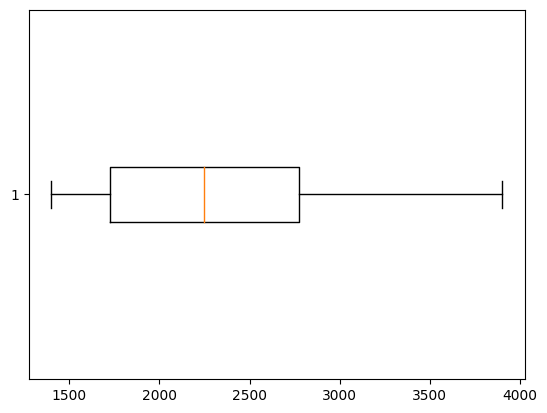

In [13]:
plt.boxplot(df.CC,vert=False)

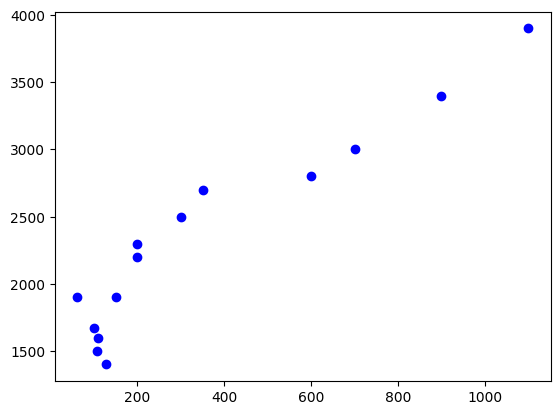

In [14]:
plt.scatter(x=df['WG'],y=df['CC'],color='blue')

In [15]:
np.corrcoef(df.WG,df.CC)

#  Strong Correlation.

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [16]:
# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(df.CC,df.WG)[0, 1]
cov_output

237669.4505494506

In [17]:
# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('WG ~ CC', data = df).fit()
model.summary()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     WG   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           2.86e-07
Time:                        10:05:04   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.000    -845.427    -406.078
CC             0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
pred1 = model.predict(df['CC'])

In [19]:
df['CC_pred']=pred1

In [20]:
df.head()

,WG,CC,CC_pred
0,108,1500,4.482599
1,200,2300,340.607908
2,900,3400,802.780209
3,200,2200,298.592245
4,300,2500,424.639236


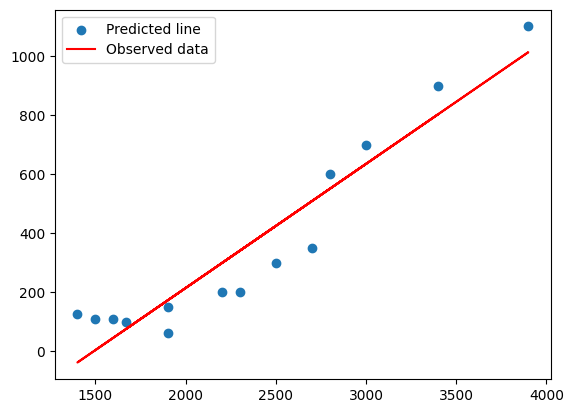

In [21]:
# Regression Line
plt.scatter(df.CC, df.WG)
plt.plot(df.CC, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()


In [22]:
res1 = df.CC - df.CC_pred  #error
res_sqr1 = res1 * res1 # squared error
mse1 = np.mean(res_sqr1) # mean squared error
rmse1 = np.sqrt(mse1) #root mean squared error
rmse1

2027.0402826232014

In [23]:
######### Model building on Transformed Data

# logarith transformation
model2 = smf.ols('CC ~ np.log(WG)', data = df).fit()
model2.summary()
pred2 = model2.predict(pd.DataFrame(df['WG']))

# Error calculation
res2 = df.CC - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


253.55804039366257

In [24]:
#### Exponential transformation
# x = wg; y = log(CC)

model3 = smf.ols('np.log(CC) ~ WG', data = df).fit()
model3.summary()

pred3 = model3.predict(pd.DataFrame(df['WG']))
pred3_at = np.exp(pred3)
pred3_at

# Error calculation
res3 = df.CC - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


272.4207117048499

In [25]:
#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(CC) ~ WG + I(WG*WG)', data = df).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(df))
pred4_at = np.exp(pred4)
pred4_at

# Error calculation
res4 = df.CC - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


240.82777570407129

In [26]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,2027.040283
1,Log model,253.558040
2,Exp model,272.420712
3,Poly model,240.827776


In [27]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2)

train.shape,test.shape



((11, 3), (3, 3))

In [28]:
#building and training our final model(polynomial) on train data
finalmodel = smf.ols('np.log(CC) ~ WG + I(WG*WG)', data = train).fit()
finalmodel.summary()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(CC)   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     14.43
Date:                Sat, 08 Apr 2023   Prob (F-statistic):            0.00222
Time:                        10:05:07   Log-Likelihood:                 8.0054
No. Observations:                  11   AIC:                            -10.01
Df Residuals:                       8   BIC:                            -8.817
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1641      0.134     53.322      0.000       6.854       7.474
WG             0.0028      0.001      2.572      0.033       0.000       0.005
I(WG * WG) -2.336e-06   1.41e-06     -1.652      0.137    -5.6e-06    9.24e-07
==============================================================================
Omnibus:                        0.796   Durbin-Watson:                   1.310
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.077
Skew:                          -0.205   Prob(JB):                        0.962
Kurtosis:                       2.990   Cond. No.                     6.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
import sklearn

In [30]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
